In [1]:
import pandas as pd
import numpy as np

In [2]:
# Add the python path to the folder containing some useful custom packages.
import sys
sys.path.insert(0, "../packages/")
from TsIP.TsIP import TsIP
from NestedCV import NestedCV

# Yemen 

I create the dataset of time-series of the Yemen country.

In [3]:
PATH_TO_SAVE = "./data/Yemen/"

## Data sources

For more details regarding each single data source see the folder *Data Sources*.

In [4]:
PATH_TO_DATA_FOLDER = "../Data Sources/"

    - Food Consumption Score:

In [5]:
# Load the data of the fcs indicator released by wfp.
fcs = pd.read_csv(PATH_TO_DATA_FOLDER + "Food Consumption Score (FCS)/output_timeseries/Yemen/wfp_fcs-no-nan.csv", header = [0, 1], index_col = 0)
fcs.index.name = "Datetime"
fcs.index = pd.to_datetime(fcs.index)
freq = "D"
fcs.index.freq = freq

    - Reduced Coping Strategy Index

In [6]:
# Load the the data of the rcsi indicator released by wfp.
rcsi = pd.read_csv(PATH_TO_DATA_FOLDER + "Reduced Coping Strategy Index (rCSI)/output_timeseries/Yemen/wfp_rcsi-no-nan.csv", header = [0, 1], index_col = 0)
rcsi.index.name = "Datetime"
rcsi.index = pd.to_datetime(rcsi.index)
freq = "D"
rcsi.index.freq = freq

    - Rainfall:

In [7]:
# Load the data of rainfall indicator released by wfp.
rainfall = pd.read_csv(PATH_TO_DATA_FOLDER + "Rainfall & Vegetation/output_timeseries/Yemen/wfp_rainfall_SvyWindow.csv", header = [0, 1], index_col = 0)
rainfall.index.name = "Datetime"
rainfall.index = pd.to_datetime(rainfall.index)
freq = "D"
rainfall.index.freq = freq

    - NDVI:

In [8]:
# Load the data of vegetation indicator released by wfp.
NDVI = pd.read_csv(PATH_TO_DATA_FOLDER + "Rainfall & Vegetation/output_timeseries/Yemen/wfp_NDVI_SvyWindow.csv", header = [0, 1], index_col = 0)
NDVI.index.name = "Datetime"
NDVI.index = pd.to_datetime(NDVI.index)
freq = "D"
NDVI.index.freq = freq

    - Conflict:

In [9]:
# Load the data of conflicts indicator released by ACLED.
conflict = pd.read_csv(PATH_TO_DATA_FOLDER + "Conflicts/output_timeseries/Yemen/wfp_conflicts_sum_event_SvyWindow.csv", header = [0, 1], index_col = 0)
conflict.index.name = "Datetime"
conflict.index = pd.to_datetime(conflict.index)
freq = "D"
conflict.index.freq = freq

    - Market price:

In [10]:
# Load the data of market prices indicator released by wfp.
price = pd.read_csv(PATH_TO_DATA_FOLDER + "Market Prices/output_timeseries/Yemen/wfp_relevant_market_price-exchange-rate-cereals.csv", header = [0, 1], index_col = 0)
price.index.name = "Datetime"
price.index = pd.to_datetime(price.index)
freq = "D"
price.index.freq = freq

    - Population:

In [11]:
# Load the data of population released by wfp.
population = pd.read_csv(PATH_TO_DATA_FOLDER + "Population/output_timeseries/Yemen/wfp_population.csv", header = [0, 1], index_col = 0)
population.index.name = "Datetime"
population.index = pd.to_datetime(population.index)
freq = "D"
population.index.freq = freq

    - Coordinates:

In [12]:
# Load the data of coordination.
coordinates = pd.read_csv(PATH_TO_DATA_FOLDER + "Coordinates/output_timeseries/Yemen/wfp_coordinates.csv", header = [0, 1], index_col = 0)
coordinates.index.name = "Datetime"
coordinates.index = pd.to_datetime(coordinates.index)
freq = "D"
coordinates.index.freq = freq

    - Ramadan:

In [13]:
# Load the data of ramadan.
ramadan = pd.read_csv(PATH_TO_DATA_FOLDER + "Ramadan/output_timeseries/Yemen/wfp_ramadan_SvyWindow.csv", header = [0, 1], index_col = 0)
ramadan.index.name = "Datetime"
ramadan.index = pd.to_datetime(ramadan.index)
freq = "D"
ramadan.index.freq = freq

In [14]:
# Create the full dataset.
df = pd.concat([fcs, rcsi, rainfall, conflict, NDVI, price, population, coordinates, ramadan], axis = 1, levels = 0).sort_index(axis = 1)

In [15]:
# Create the no nan values.
df = df.dropna()
df

AdminStrata                        Abyan                                \
Indicator   1 Month Anomaly (%) Rainfall 3 Months Anomaly (%) Rainfall   
Datetime                                                                 
2018-08-22                    273.127727                    330.007392   
2018-08-23                    272.395637                    327.547664   
2018-08-24                    271.663548                    325.087935   
2018-08-25                    270.931459                    322.628207   
2018-08-26                    270.199369                    320.168478   
...                                  ...                           ...   
2020-03-27                    347.268417                    392.975187   
2020-03-28                    348.721238                    393.935815   
2020-03-29                    350.174059                    394.896442   
2020-03-30                    351.626880                    395.857070   
2020-03-31                    353.079701                    396.817698   

AdminStrata                                                                 \
Indicator   Cereals and tubers Exchange rate (USD/LCU)        FCS Fatality   
Datetime                                                                     
2018-08-22           -0.805568               -0.289209  31.809805     10.0   
2018-08-23           -0.797094               -0.266460  32.374660     10.0   
2018-08-24           -0.788619               -0.243711  33.772110     10.0   
2018-08-25           -0.780144               -0.220962  34.533738     10.0   
2018-08-26           -0.771669               -0.198213  32.327892     10.0   
...                        ...                     ...        ...      ...   
2020-03-27            0.375805                1.323238  36.424816     13.0   
2020-03-28            0.386164                1.323920  37.334711     12.0   
2020-03-29            0.396522                1.324603  37.034036     12.0   
2020-03-30            0.406881                1.325285  36.722156     12.0   
2020-03-31            0.417239                1.325968  38.885653     12.0   

AdminStrata                                                ...  \
Indicator          Lat        Lon NDVI Anomaly Population  ...   
Datetime                                                   ...   
2018-08-22   13.704878  46.158142  3051.954690   615154.0  ...   
2018-08-23   13.704878  46.158142  3048.945680   615154.0  ...   
2018-08-24   13.704878  46.158142  3045.883031   615154.0  ...   
2018-08-25   13.704878  46.158142  3042.766744   615154.0  ...   
2018-08-26   13.704878  46.158142  3039.596818   615154.0  ...   
...                ...        ...          ...        ...  ...   
2020-03-27   13.704878  46.158142  3344.619211   615154.0  ...   
2020-03-28   13.704878  46.158142  3342.285254   615154.0  ...   
2020-03-29   13.704878  46.158142  3340.268611   615154.0  ...   
2020-03-30   13.704878  46.158142  3338.569282   615154.0  ...   
2020-03-31   13.704878  46.158142  3337.187269   615154.0  ...   

AdminStrata                   Taizz                                            \
Indicator   Exchange rate (USD/LCU)        FCS Fatality        Lat        Lon   
Datetime                                                                        
2018-08-22                -0.288072  39.043078    171.0  13.416517  43.778161   
2018-08-23                -0.262707  39.371670    147.0  13.416517  43.778161   
2018-08-24                -0.237341  36.662083    145.0  13.416517  43.778161   
2018-08-25                -0.211976  37.205170    156.0  13.416517  43.778161   
2018-08-26                -0.186611  37.025723    164.0  13.416517  43.778161   
...                             ...        ...      ...        ...        ...   
2020-03-27                 1.299124  36.978801     59.0  13.416517  43.778161   
2020-03-28                 1.298782  36.049107     64.0  13.416517  43.778161   
2020-03-29                 1.298441  37.513721     62.

Not consider the two provinces *Hadramaut* and *Socotra*.

In [16]:
df.drop(["Hadramaut", "Socotra"], axis = 1, level = 0, inplace = True)
fcs.drop(["Hadramaut", "Socotra"], axis = 1, level = 0, inplace = True)

In [17]:
# Plot time-series.
#TsIP(df).interactive_plot_df(matplotlib = False, style = "lines", first_last_valid_index_group = True)

In [18]:
PROVINCES = df.columns.get_level_values(0).unique()
PROVINCES

Index(['Abyan', 'Aden', 'Al Bayda', 'Al Dhale'e', 'Al Hudaydah', 'Al Jawf',
       'Al Maharah', 'Al Mahwit', 'Amanat Al Asimah', 'Amran', 'Dhamar',
       'Hajjah', 'Ibb', 'Lahj', 'Marib', 'Raymah', 'Sa'ada', 'Sana'a',
       'Shabwah', 'Taizz'],
      dtype='object', name='AdminStrata')

In [19]:
PREDICTORS = df.columns.get_level_values(1).unique()
PREDICTORS

Index(['1 Month Anomaly (%) Rainfall', '3 Months Anomaly (%) Rainfall',
       'Cereals and tubers', 'Exchange rate (USD/LCU)', 'FCS', 'Fatality',
       'Lat', 'Lon', 'NDVI Anomaly', 'Population', 'Rainfall (mm)', 'Ramadan',
       'rCSI'],
      dtype='object', name='Indicator')

In [20]:
# Save the datasets.
df.to_csv(PATH_TO_SAVE + "Yemen.csv", index_label = False)

## Smoothed data

We decide to create a smoothed version of the data. 

N.B. This methodology is biased because we smooth all the data together ignoring the subdivision in training, validation and test set that will be used to forecast the time-series.

In [21]:
# This features will not be modified (static feature).
static_indicators = ["Lat", "Lon", "Population", "Ramadan"]

In [22]:
from scipy.signal import savgol_filter

def smooth(serie):
    if serie.name[1] in static_indicators:
        return serie
    
    # Smooth serie.
    smooth_serie = savgol_filter(serie, 31, 7)

    return smooth_serie

df_smooth = df.copy().apply(smooth)

In [23]:
# Comparison plot time-series.
#TsIP(df, df_smooth).interactive_plot_df(matplotlib = False, style = "lines", first_last_valid_index_group = True, comparison = True)

In [24]:
# Save the smoothed datasets.
df_smooth.to_csv(PATH_TO_SAVE + "Yemen_smooth.csv", index_label = False)

## Create training set, validation set, test set

In [25]:
# Example.
group = df_smooth.Abyan
group.head()

Indicator,1 Month Anomaly (%) Rainfall,3 Months Anomaly (%) Rainfall,Cereals and tubers,Exchange rate (USD/LCU),FCS,Fatality,Lat,Lon,NDVI Anomaly,Population,Rainfall (mm),Ramadan,rCSI
Datetime,,,,,,,,,,,,,
2018-08-22,272.996620,329.812515,-0.809652,-0.311746,31.760546,11.079923,13.704878,46.158142,3051.979011,615154.0,13.004304,0.0,38.673283
2018-08-23,272.543931,327.799826,-0.792675,-0.242077,32.901378,8.614293,13.704878,46.158142,3048.909426,615154.0,13.046145,0.0,36.022125
2018-08-24,271.817178,325.286663,-0.783539,-0.215680,33.256509,8.653276,13.704878,46.158142,3045.861183,615154.0,13.168369,0.0,35.751261
2018-08-25,270.967023,322.622392,-0.778592,-0.212394,33.361519,9.908177,13.704878,46.158142,3042.776761,615154.0,13.347198,0.0,36.892743
2018-08-26,270.097136,319.994629,-0.774830,-0.215655,33.542269,11.522452,13.704878,46.158142,3039.625882,615154.0,13.551489,0.0,38.731071


### Holdout validation

<img src="./images/holdout.png" width="400">

In [26]:
cv = NestedCV(5, validation_size = 0.2, test_size = 0.1, gap = 1, TimeSeriesSplit = True)

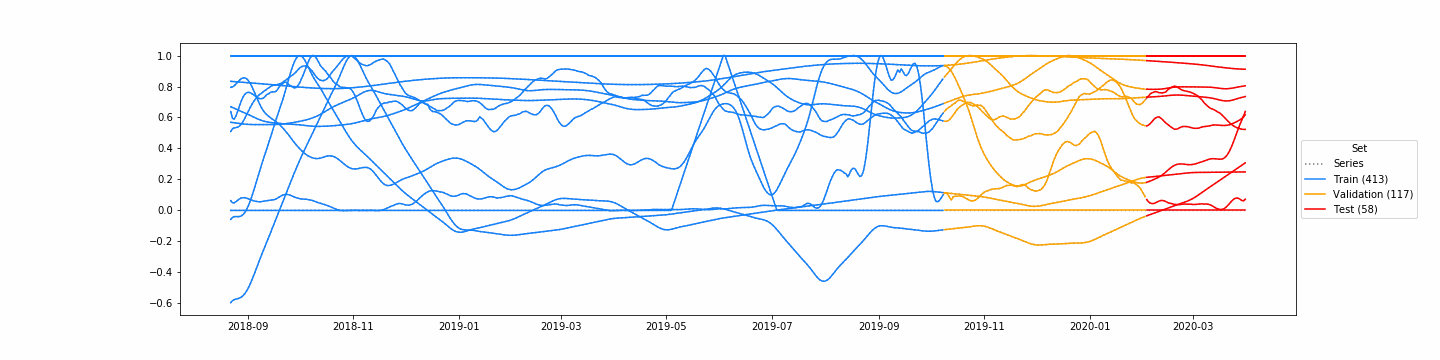

In [27]:
splits = cv.get_splits(group, show = True, path = "./images/")

### Nested cross validation

<img src="./images/nestedCV.png" width="600">

In [28]:
cv = NestedCV(5, validation_size = 0.328, test_size = 0.328, gap = 0.832, TimeSeriesSplit = True)

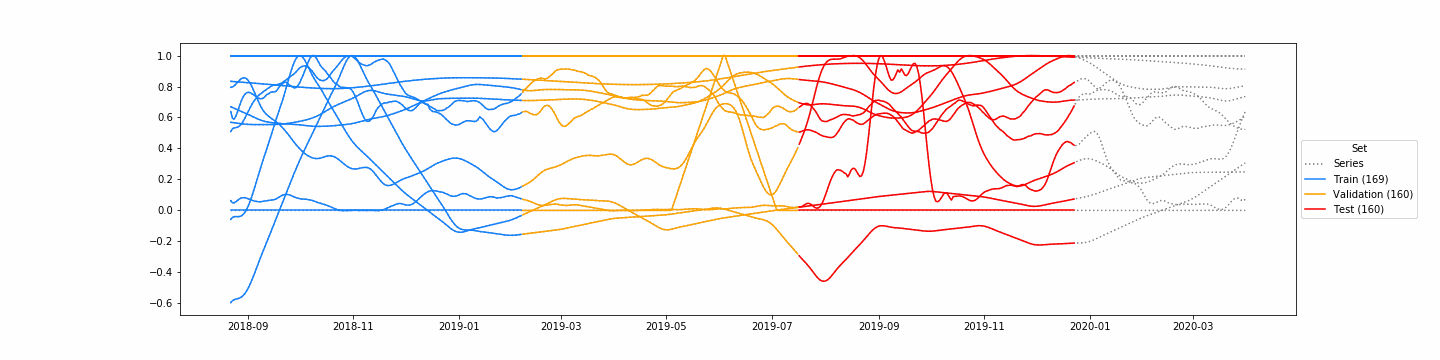

In [29]:
splits = cv.get_splits(group, show = True, path = "./images/")

## Save nested cross validation sets

In [30]:
cv = NestedCV(5, validation_size = 0.328, test_size = 0.328, gap = 0.832, TimeSeriesSplit = True)

In [31]:
splits = cv.get_splits(df, show = False)

In [32]:
train_folds = [set_[0] for set_ in splits]
validation_folds = [set_[1] for set_ in splits]
test_folds = [set_[2] for set_ in splits]

In [33]:
from pandas import ExcelWriter

In [34]:
# Save the folds of each set (training, validation and test) into different excel sheets.
def save_xls(list_dfs, xls_path):
    with ExcelWriter(xls_path) as writer:
        for n, df in enumerate(list_dfs):
            df.to_excel(writer, "fold%s" % (n+1), index_label = False)
        writer.save()

In [35]:
# Save the dataframes.
save_xls(train_folds, PATH_TO_SAVE + "train_folds_smooth.xlsx")
save_xls(validation_folds, PATH_TO_SAVE + "validation_folds_smooth.xlsx")
save_xls(test_folds, PATH_TO_SAVE + "test_folds_smooth.xlsx")